In [1]:
%matplotlib inline

In [20]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

data_df = pandas.read_csv('da_blast_data.csv')
data_df['log(T)'] = numpy.log(data_df['#T'])
data_df['log(R)'] = numpy.log(data_df['R'])

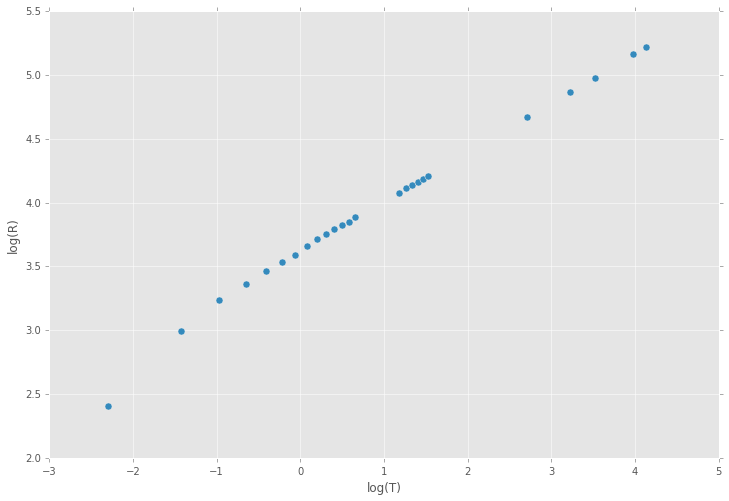

In [51]:
data_df.plot.scatter(x='log(T)', y='log(R)', figsize=(12, 8), s=50)


In [43]:
import statsmodels.api as sm
X = data_df['log(T)']
X = sm.add_constant(X)
y = data_df['log(R)']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log(R)   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2886.
Date:                Sat, 21 Jan 2017   Prob (F-statistic):           1.11e-25
Time:                        21:53:42   Log-Likelihood:                 35.659
No. Observations:                  25   AIC:                            -67.32
Df Residuals:                      23   BIC:                            -64.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.5903      0.014    258.645      0.000         3.562     3.619
log(T)         0.4058      0.008     53.720      0.000         0.390     0.421
==============================================================================
Omnibus:                       42.113   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.330
Skew:                          -3.086   Prob(JB):                     1.13e-34
Kurtosis:                      13.583   Cond. No.                         2.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
results.rsquared

0.99209300016489965

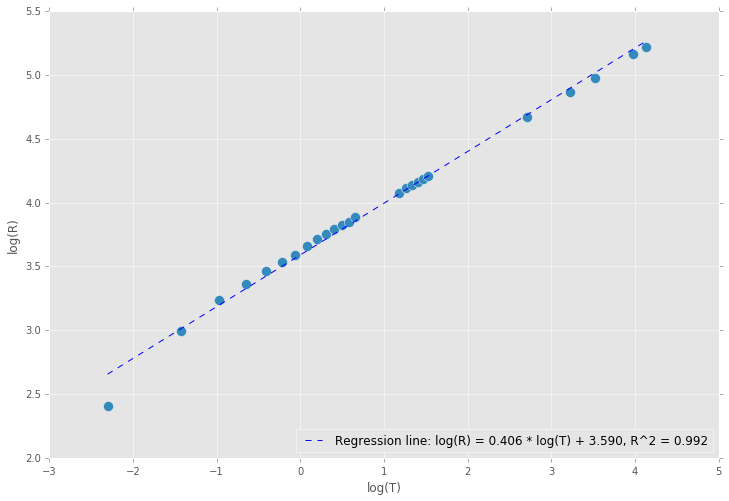

In [71]:
axes = data_df.plot.scatter(x='log(T)', y='log(R)', figsize=(12, 8), s=100)
axes.add_line(plt.Line2D(data_df['log(T)'], results.predict(X), ls='--',
             label='Regression line: log(R) = {m:.3f} * log(T) + {c:.3f}, R^2 = {r2:.3f}'
            .format(m=results.params['log(T)'], c=results.params['const'], r2=results.rsquared)))
axes.legend(loc=4)